In [109]:
import networkx as nx
import matplotlib.pyplot as plt

In [110]:
doc = "In mathematics, graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices, also called nodes or points, which are connected by edges, also called links or lines. A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetrically. Graphs are one of the principal objects of study in discrete mathematics."

In [111]:
doc

'In mathematics, graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices, also called nodes or points, which are connected by edges, also called links or lines. A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetrically. Graphs are one of the principal objects of study in discrete mathematics.'

# 1.

In [112]:
def preprocess_document(document, sentence_spliter='.', word_spliter=' ', punct_mark=','):
    # lowercase all words and remove trailing whitespaces
    document = document.lower().strip()
    
    # remove unwanted punctuation marks
    for pm in punct_mark:
        document = document.replace(pm, '')
    
    # get list of sentences which are non-empty
    sentences = [sent for sent in document.split(sentence_spliter) if sent != '']
    
    # get list of sentences which are lists of words
    document = []
    for sent in sentences:
        words = sent.strip().split(word_spliter)
        document.append(words)
        
    return document

In [113]:
def get_entities(document):
    # in our case, entities are all unique words
    unique_words = []
    for sent in document:
        for word in sent:
            if word not in unique_words:
                unique_words.append(word)
    return unique_words

In [114]:
def get_relations(document):
    # in our case, relations are bigrams in sentences
    bigrams = []
    for sent in document:
        for i in range(len(sent)-1):
            pair = [sent[i], sent[i+1]]
            if pair not in bigrams:
                bigrams.append(pair)
    return bigrams

In [118]:
def build_graph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    # get graph nodes
    nodes = get_entities(pdoc)
    # get graph edges
    edges = get_relations(pdoc)
    # create graph structure with NetworkX
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [116]:
def plot_graph(G, title=None):
    # set figure size
    plt.figure(figsize=(10,10))
    
    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G)
    
    # draw nodes and edges
    nx.draw(G, pos=pos, with_labels=True)
    
    # get edge labels (if any)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    # draw edge labels (if any)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # plot the title (if any)
    plt.title(title)
    
    plt.show()
    return

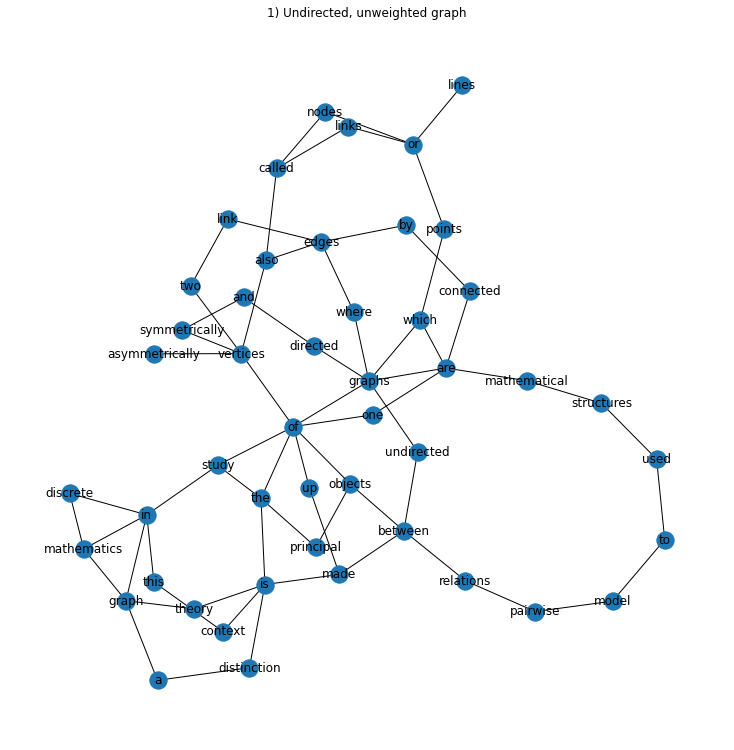

In [117]:
G = build_graph(doc)
plot_graph(G, title='1) Undirected, unweighted graph')

# 2.

In [102]:
def build_digraph(document):
    # preprocess document for standardization
    pdoc = preprocess_document(doc, '.', ' ', ',')
    # get graph nodes
    nodes = get_entities(pdoc)
    # get graph edges
    edges = get_relations(pdoc)
    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

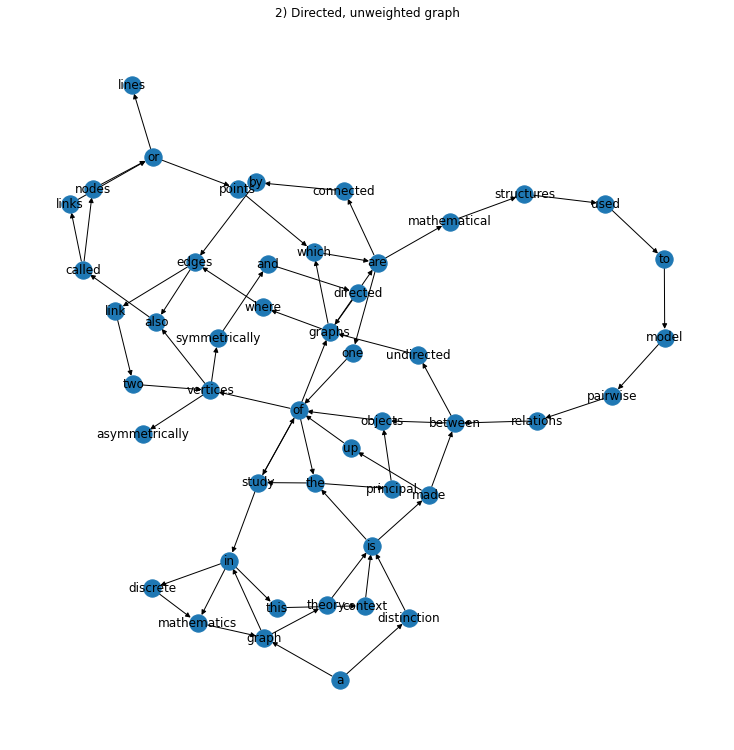

In [103]:
G = build_digraph(doc)
plot_graph(G, title='2) Directed, unweighted graph')

# 3.

In [104]:
def get_weighted_edges(document):
    # in our case, relations are bigrams in sentences
    # weights are number of equal bigrams
    bigrams = {}
    for sent in document:
        for i in range(len(sent)-1):
            # transform to hashable key in dict
            pair = str([sent[i], sent[i+1]])
            if pair not in bigrams.keys():
                # weight = 1
                bigrams[pair] = 1
            else:
                # weight + 1
                bigrams[pair] += 1
                
    # convert to NetworkX standard form
    weighted_edges_format = []
    for pair, weight in bigrams.items():
        w1, w2 = eval(pair)
        weighted_edges_format.append([w1, w2, weight])
        
    return weighted_edges_format

In [105]:
def build_weighted_digraph(document):
    # preprocess document for standardization
    pdoc = preprocess_document(doc, '.', ' ', ',')
    # get graph nodes
    nodes = get_entities(pdoc)
    # get weighted edges
    weighted_edges = get_weighted_edges(pdoc)
    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)
    return G

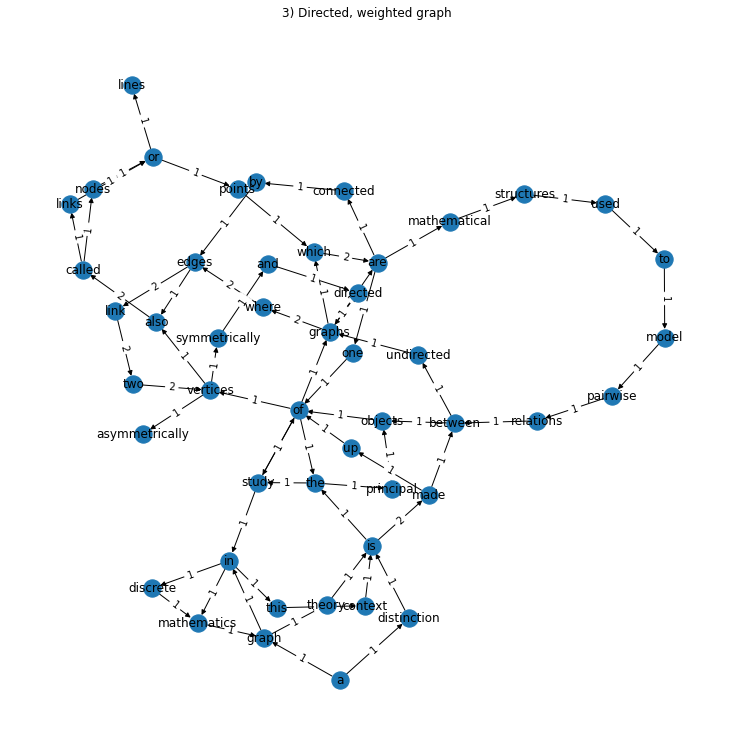

In [106]:
G = build_weighted_digraph(doc)
plot_graph(G, title='3) Directed, weighted graph')